# Import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import the data

In [3]:
 # path to string
path = r'/Users/puchater/Documents/CareerFoundry/Data Immersion/6 Final Project/2 Data'

In [4]:
happy = pd.read_pickle(os.path.join(path, 'Prepared Data', 'happy_clean_data.pkl'))

# Data cleaning

In [5]:
happy.columns

Index(['Country', 'Year', 'Happiness score', 'GDP', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity', 'Corruption',
       'Positive affect', 'Negative affect'],
      dtype='object')

In [6]:
happy.rename(columns = {'Country name' : 'Country', 'year': 'Year', 
                     'Life Ladder': 'Happiness score', 'Log GDP per capita': 'GDP',
                     'Social support': 'Social support', 'Healthy life expectancy at birth' : 'Life expectancy', 'Freedom to make life choices' : 'Freedom', 'Generosity':'Generosity',
                      'Perceptions of corruption':'Corruption', 'Positive affect':'Positive affect', 'Negative affect': 'Negative affect'},
                      inplace = True)

In [7]:
happy.head()

,Country,Year,Happiness score,GDP,Social support,Life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [8]:
happy.shape

(1961, 11)

In [9]:
# Check for missing values

happy.isnull().sum()


Country            0
Year               0
Happiness score    0
GDP                0
Social support     2
Life expectancy    0
Freedom            0
Generosity         0
Corruption         0
Positive affect    0
Negative affect    1
dtype: int64

In [10]:
happy_life_expect_clean = happy[happy['Life expectancy'].notna()]

In [11]:
happy_life_expect_clean.isnull().sum()

Country            0
Year               0
Happiness score    0
GDP                0
Social support     2
Life expectancy    0
Freedom            0
Generosity         0
Corruption         0
Positive affect    0
Negative affect    1
dtype: int64

In [12]:
dups = happy_life_expect_clean.duplicated()

In [13]:
dups.shape # No dups

(1961,)

/var/folders/h2/_kwm8tsx60g1sw4xhnb42h500000gn/T/ipykernel_3194/173165831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(happy_life_expect_clean['Happiness score'], bins=25) # Shows extreme values


<Axes: xlabel='Happiness score', ylabel='Density'>

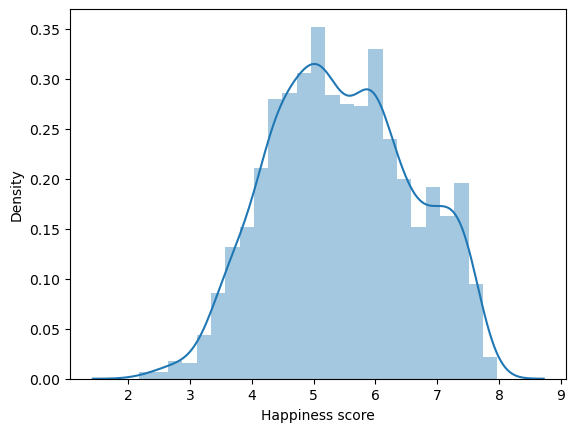

In [14]:
sns.distplot(happy_life_expect_clean['Happiness score'], bins=25) # Shows extreme values

/var/folders/h2/_kwm8tsx60g1sw4xhnb42h500000gn/T/ipykernel_3194/3291797142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(happy_life_expect_clean['Life expectancy'], bins=25) # Shows extreme values


<Axes: xlabel='Life expectancy', ylabel='Density'>

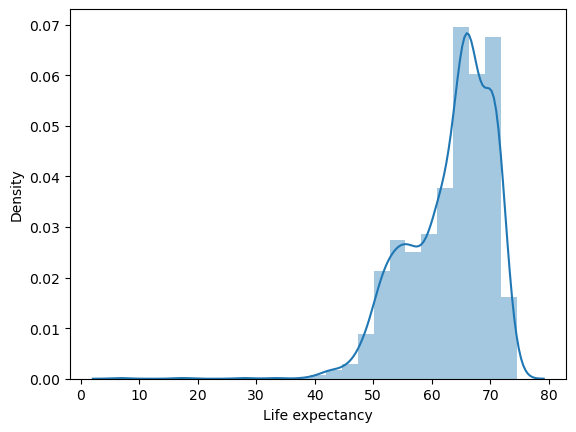

In [15]:
sns.distplot(happy_life_expect_clean['Life expectancy'], bins=25) # Shows extreme values

In [16]:
happy_life_expect_clean['Happiness score'].mean() # Check the mean

5.460338924078234

In [17]:
happy_life_expect_clean['Happiness score'].median() # Check the median

5.392012119293213

In [18]:
happy_life_expect_clean['Happiness score'].max() # Check the max

7.970891952514648

In [19]:
%matplotlib inline

# Preparing the data for ploting

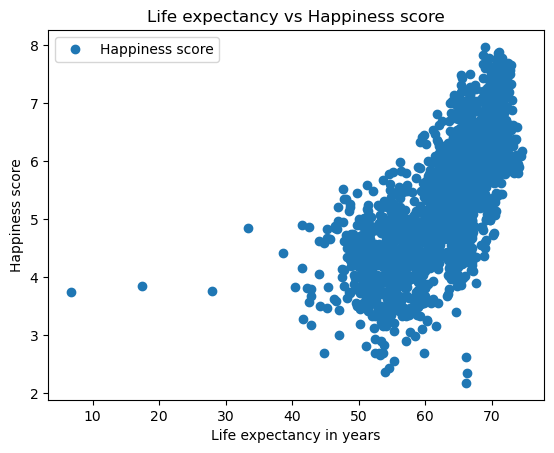

In [20]:
happy_life_expect_clean.plot(x = 'Life expectancy', y='Happiness score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Life expectancy vs Happiness score')  
plt.xlabel('Life expectancy in years')  
plt.ylabel('Happiness score')  
plt.show()

In [21]:
X = happy_life_expect_clean['Life expectancy'].values.reshape(-1,1)
y = happy_life_expect_clean['Happiness score'].values.reshape(-1,1)

In [22]:
X

array([[50.5       ],
       [50.79999924],
       [51.09999847],
       ...,
       [53.57500076],
       [54.04999924],
       [54.52500153]])

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Hypothesis: The higher the life expectancy the higher the happiness score.

In [24]:
# I chose to use life expectancy factor because it is trully independent variable. The other factors in the dataset are represented as the contribution effect.

# Regression analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

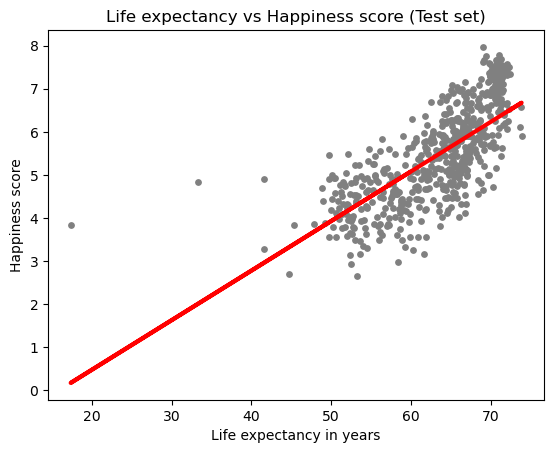

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Life expectancy vs Happiness score (Test set)')
plot_test.xlabel('Life expectancy in years')
plot_test.ylabel('Happiness score')
plot_test.show()

In [29]:
# The regression fit is not perfect. One reason could be the outliers. Another reason could be nonlinear relationship between those two variables.
# As we know from the happiness report there are more than one factor involved in happiness prediction.

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Root Mean Squared Error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.1152057]]
Root Mean Squared Error:  0.6012790384257772
R2 score:  0.5303933152741984


In [32]:
# I see that the model prediction is not accurate (R2=0.53) due to outliers.
# I am excluding the outliers.

In [33]:
happy_clean_test = happy_life_expect_clean[happy_life_expect_clean['Life expectancy'] >=45] 


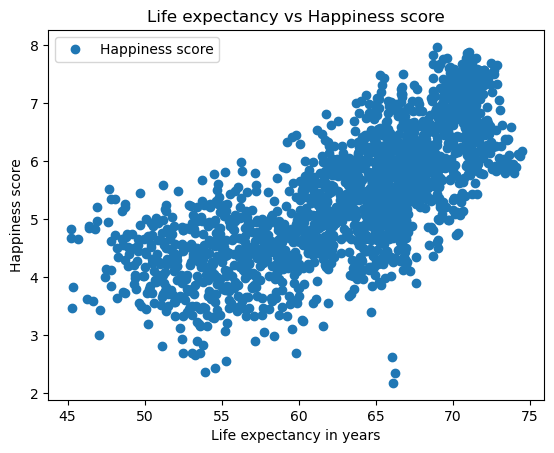

In [34]:
happy_clean_test.plot(x = 'Life expectancy', y='Happiness score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Life expectancy vs Happiness score')  
plt.xlabel('Life expectancy in years')  
plt.ylabel('Happiness score')  
plt.show()

In [35]:
X_2 = happy_clean_test['Life expectancy'].values.reshape(-1,1)
y_2 = happy_clean_test['Happiness score'].values.reshape(-1,1)


In [36]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)


In [37]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)


LinearRegression()

In [38]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)


In [39]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)


In [40]:
print('Slope:' ,regression.coef_)
print('Root Mean Squared Error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.12627411]]
Root Mean Squared Error:  0.6278314645510479
R2 score:  0.5367408245252736


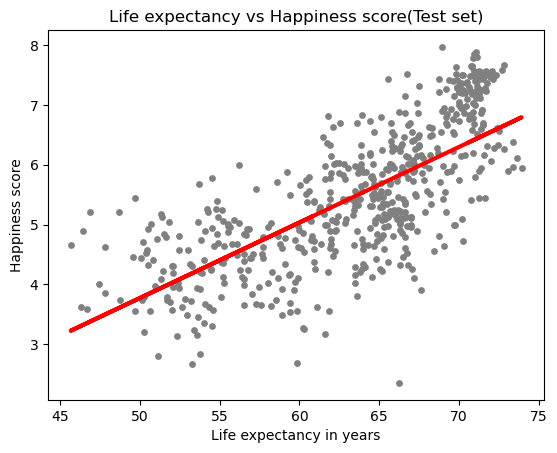

In [41]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Life expectancy vs Happiness score(Test set)')
plot_test.xlabel('Life expectancy in years')
plot_test.ylabel('Happiness score')
plot_test.show()

In [42]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,4.815310,5.131226
1,5.992826,4.560468
2,4.953917,5.707036
3,3.553020,3.848281
4,4.982720,5.022631
5,6.964645,6.340932
6,6.689609,6.419222
7,6.112745,6.758900
8,7.218840,6.136368
9,5.750282,6.022722


In [43]:
# The model after removing outliers is not very accurate. The R2 value is quite low (0.54). As above there could be not simply two variable correlations and not exacly linear correlation between happiness score and life expectancy.  


In [44]:
happy_life_expect_clean.head()

,Country,Year,Happiness score,GDP,Social support,Life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [45]:
happy_life_expect_clean.isnull().sum()

Country            0
Year               0
Happiness score    0
GDP                0
Social support     2
Life expectancy    0
Freedom            0
Generosity         0
Corruption         0
Positive affect    0
Negative affect    1
dtype: int64

In [46]:
happy_life_expect_clean.loc[happy_life_expect_clean['Happiness score']<4.5,'happy_flag'] = '1-4.5'

In [47]:
happy_life_expect_clean.loc[(happy_life_expect_clean['Happiness score']>=4.5)& (happy_life_expect_clean['Happiness score']<6),'happy_flag'] = '4.5-6'

In [48]:
happy_life_expect_clean.loc[happy_life_expect_clean['Happiness score']>6,'happy_flag'] = '6-8'

In [197]:
happy_life_expect_clean.describe()

,Year,Happiness score,GDP,Social support,Life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
count,1961.000000,1961.000000,1961.000000,1959.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1960.000000
mean,2014.296787,5.460339,9.345160,0.808112,63.160956,0.745664,0.000474,0.747746,0.653790,0.273280
std,4.646442,1.142145,1.158216,0.123457,7.065882,0.140511,0.161716,0.185111,0.107523,0.085272
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.337527,0.035198,0.178886,0.094316
25%,2011.000000,4.609059,8.447203,0.739314,58.599998,0.653197,-0.108435,0.692341,0.570918,0.209621
50%,2014.000000,5.392012,9.494558,0.834077,65.000000,0.767357,-0.022424,0.802138,0.665050,0.262293
75%,2018.000000,6.276443,10.307556,0.906106,68.574997,0.857063,0.090753,0.869894,0.741082,0.324709
max,2022.000000,7.970892,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


In [198]:
# Export your dataframe as a pickle file and store in “Prepared Data” folder.
happy_life_expect_clean.to_csv(os.path.join(path, 'Prepared Data', 'happy_clean_data.csv'))

In [102]:
# Export your dataframe as a pickle file and store in “Prepared Data” folder.
# happy_life_expect_clean.to_pickle(os.path.join(path, 'Prepared Data', 'happy_clean_data.pkl'))